In [ ]:
SEQ_LENGTH = 1
LEARNING_RATE = 8e-4

PATH = "dataset/"
data_filename = "filtered_data.csv"


import pandas as pd

df = pd.read_csv(f"{PATH}/{data_filename}")
df.fillna(0, inplace=True)

df['Data e Hora'] = pd.to_datetime(df['Data e Hora'])
df = df.set_index('Data e Hora')
df.head()

,producao_total,producao_renovavel,hidrica,eolica,solar,ondas,biomassa,producao_nao_renovavel,carvao,gas_natural,termica,producao_por_bombagem,importacao,exportacao
Data e Hora,,,,,,,,,,,,,,
2011-01-01,107.975628,73.076341,63.952042,2.142578,0.122491,0.0,6.859230,34.484478,4.3443,28.367837,1.772341,0.414810,12.4186,0.0852
2011-01-02,109.657562,71.219553,62.732572,1.469945,0.197608,0.0,6.819428,37.876984,0.7383,35.343969,1.794715,0.561025,20.8615,0.0000
2011-01-03,150.642916,74.660080,63.158904,4.503582,0.166772,0.0,6.830821,74.808327,14.9438,55.179956,4.684572,1.174509,13.4903,1.0916
2011-01-04,159.833303,101.106584,64.904843,28.734425,0.256511,0.0,7.210805,58.567678,4.8496,48.985982,4.732096,0.159041,9.3552,0.7629
2011-01-05,170.854279,133.687873,67.566754,58.869586,0.208719,0.0,7.042814,36.428947,4.6337,27.003927,4.791320,0.737460,6.7881,6.8363


In [53]:
import numpy as np

# df = df.apply(np.log1p)
df.head()

,producao_total,producao_renovavel,hidrica,eolica,solar,ondas,biomassa,producao_nao_renovavel,carvao,gas_natural,termica,producao_por_bombagem,importacao,exportacao
Data e Hora,,,,,,,,,,,,,,
2011-01-01,107.975628,73.076341,63.952042,2.142578,0.122491,0.0,6.859230,34.484478,4.3443,28.367837,1.772341,0.414810,12.4186,0.0852
2011-01-02,109.657562,71.219553,62.732572,1.469945,0.197608,0.0,6.819428,37.876984,0.7383,35.343969,1.794715,0.561025,20.8615,0.0000
2011-01-03,150.642916,74.660080,63.158904,4.503582,0.166772,0.0,6.830821,74.808327,14.9438,55.179956,4.684572,1.174509,13.4903,1.0916
2011-01-04,159.833303,101.106584,64.904843,28.734425,0.256511,0.0,7.210805,58.567678,4.8496,48.985982,4.732096,0.159041,9.3552,0.7629
2011-01-05,170.854279,133.687873,67.566754,58.869586,0.208719,0.0,7.042814,36.428947,4.6337,27.003927,4.791320,0.737460,6.7881,6.8363


In [54]:
# df = df.apply(lambda col: col.diff(), axis=0).iloc[2:]
df.head()

,producao_total,producao_renovavel,hidrica,eolica,solar,ondas,biomassa,producao_nao_renovavel,carvao,gas_natural,termica,producao_por_bombagem,importacao,exportacao
Data e Hora,,,,,,,,,,,,,,
2011-01-01,107.975628,73.076341,63.952042,2.142578,0.122491,0.0,6.859230,34.484478,4.3443,28.367837,1.772341,0.414810,12.4186,0.0852
2011-01-02,109.657562,71.219553,62.732572,1.469945,0.197608,0.0,6.819428,37.876984,0.7383,35.343969,1.794715,0.561025,20.8615,0.0000
2011-01-03,150.642916,74.660080,63.158904,4.503582,0.166772,0.0,6.830821,74.808327,14.9438,55.179956,4.684572,1.174509,13.4903,1.0916
2011-01-04,159.833303,101.106584,64.904843,28.734425,0.256511,0.0,7.210805,58.567678,4.8496,48.985982,4.732096,0.159041,9.3552,0.7629
2011-01-05,170.854279,133.687873,67.566754,58.869586,0.208719,0.0,7.042814,36.428947,4.6337,27.003927,4.791320,0.737460,6.7881,6.8363


In [55]:
serie = ['producao_renovavel']
df = df[serie]

train_ratio = 0.8
val_ratio = 0.2
test_ratio = 0.2

train_split = int(df.shape[0] * train_ratio * (1 - val_ratio))
val_split = int(df.shape[0] * train_ratio * val_ratio)
test_split = int(df.shape[0] * test_ratio)

df_train = df[:train_split]
df_val = df[train_split:train_split + val_split]
df_test = df[:test_split]

In [56]:
def create_sequences(data, timesteps):
    X, y = [], []
    num_samples = len(data) // timesteps  # Ensure only full sequences are used

    for i in range(num_samples):
        start = len(data) - (i + 1) * timesteps
        end = start + timesteps

        if start >= 0:  # Ensure valid indexing
            X.append(data[start:end])
            y.append(data[start - 1])

    return np.array(X), np.array(y)

In [ ]:
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import optimizers

# Define the checkpoint callback
checkpoint = ModelCheckpoint(f"{PATH}/best_renewables_model.weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True, mode='min')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

df_train_scaled = scaler.fit_transform(df_train)
df_val_scaled = scaler.transform(df_val)
df_test_scaled = scaler.transform(df_test)


X_train, y_train = create_sequences(df_train_scaled, SEQ_LENGTH)
X_val, y_val = create_sequences(df_val_scaled, SEQ_LENGTH)
X_test, y_test = create_sequences(df_test_scaled, 1) # to forecast a single day


print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


# Define the LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=df_train_scaled.shape),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), loss='log_cosh', metrics=['mse', 'mae'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

Training set size: (3317, 1, 1)
Validation set size: (829, 1, 1)
Test set size: (1036, 1, 1)
Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0361 - mae: 0.2141 - mse: 0.0750 - val_loss: 0.0078 - val_mae: 0.0989 - val_mse: 0.0158
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0084 - mae: 0.1061 - mse: 0.0169 - val_loss: 0.0046 - val_mae: 0.0740 - val_mse: 0.0092
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - mae: 0.0676 - mse: 0.0075 - val_loss: 0.0045 - val_mae: 0.0722 - val_mse: 0.0090
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mae: 0.0663 - mse: 0.0075 - val_loss: 0.0045 - val_mae: 0.0722 - val_mse: 0.0090
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0036 - mae: 0.0652 - mse: 0.0073 - val_loss: 0.0046 - val_mae: 0.0736 - val_mse: 0.0092
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mae: 0.0665 - mse: 0.0076 - val_loss: 0.0045 - val_mae: 0.0724 - val_mse: 0.0090
Epoch 7

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(1036, 1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


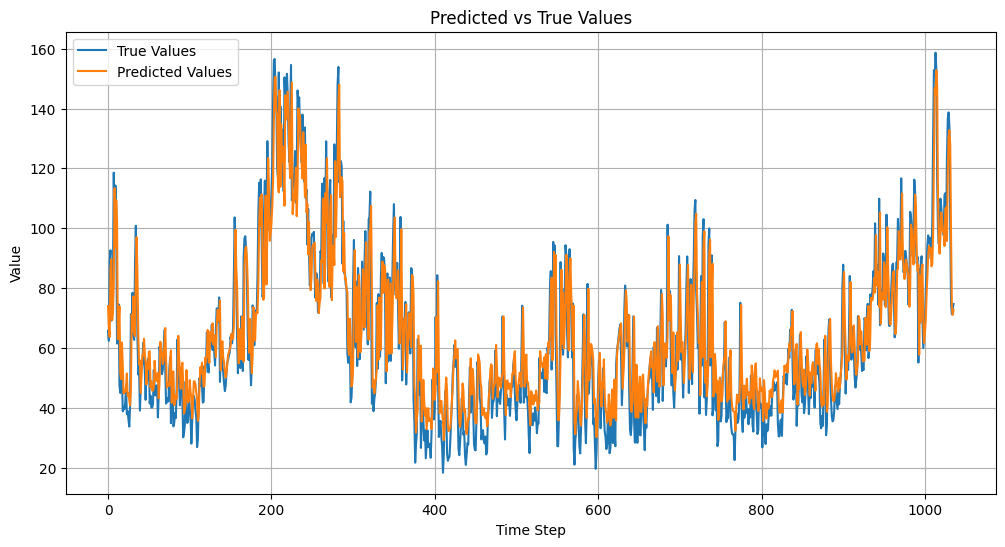

Mean Absolute Percentage Error (MAPE): 19.299%
R-squared (R2): 0.7726509790228288


In [59]:
# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_reshaped = y_pred.flatten().reshape(-1, 1)
y_test_reshaped = y_test.flatten().reshape(-1, 1)

# Inverse transform the predictions and actual values to the original scale
y_pred_original = scaler.inverse_transform(y_pred_reshaped)
y_test_original = scaler.inverse_transform(y_test_reshaped)

# Create a DataFrame for easier plotting and comparison
comparison_df = pd.DataFrame({ 'Predicted': y_pred_original.flatten(), 'True': y_test_original.flatten() })

# Plotting the predicted vs true values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df['True'], label='True Values')
plt.plot(comparison_df['Predicted'], label='Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate additional metrics (optional)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

mae_percent = mae / np.mean(y_test_original) * 100
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")
print(f"R-squared (R2): {r2}")


## TODO: Fine-tuning is not working correctly

In [ ]:
# from keras_tuner import BayesianOptimization
# from keras_tuner.engine.hyperparameters import HyperParameters

# # Define the model-building function
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(keras.layers.Input(shape=(SEQ_LENGTH, 1)))
    
#     # Tune the number of LSTM units in the first layer
#     model.add(keras.layers.LSTM(units=hp.Int('units_1', min_value=32, max_value=256, step=32), return_sequences=True))
    
#     # Tune the number of LSTM units in the second layer
#     model.add(keras.layers.LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32)))
    
#     # Tune the number of Dense units
#     model.add(keras.layers.Dense(units=hp.Int('dense_units', min_value=16, max_value=128, step=16), activation='relu'))
    
#     # Output layer
#     model.add(keras.layers.Dense(1))
    
#     # Compile the model
#     model.compile(
#         optimizer=optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-4, sampling='log')),
#         loss='log_cosh',
#         metrics=['mse', 'mae']
#     )
#     return model

# # Initialize the tuner
# tuner = BayesianOptimization(
#     build_model,
#     objective='val_loss',
#     max_trials=50,
#     directory=PATH,
#     project_name='lstm_hyperparameter_tuning'
# )

# # Perform the search
# tuner.search(
#     X_train, y_train,
#     epochs=200,
#     validation_data=(X_val, y_val),
#     callbacks=[early_stopping]
# )

# # Retrieve the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Print the best hyperparameters
# print(f"Best number of units in first LSTM layer: {best_hps.get('units_1')}")
# print(f"Best number of units in second LSTM layer: {best_hps.get('units_2')}")
# print(f"Best number of units in Dense layer: {best_hps.get('dense_units')}")
# print(f"Best learning rate: {best_hps.get('learning_rate')}")

# # Build the best model
# best_model = tuner.hypermodel.build(best_hps)

# # Train the best model
# best_model.fit(
#     X_train, y_train,
#     epochs=200,
#     validation_data=(X_val, y_val),
#     callbacks=[checkpoint, early_stopping]
# )

# # Evaluate the best model
# loss = best_model.evaluate(X_test, y_test)
# print("Test Loss:", loss)

Reloading Tuner from ./lstm_hyperparameter_tuning/tuner0.json
Best number of units in first LSTM layer: 256
Best number of units in second LSTM layer: 96
Best number of units in Dense layer: 64
Best learning rate: 9.872797305747005e-05
Epoch 1/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0468 - mae: 0.2593 - mse: 0.0975 - val_loss: 0.0263 - val_mae: 0.1848 - val_mse: 0.0540
Epoch 2/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0153 - mae: 0.1267 - mse: 0.0313 - val_loss: 0.0073 - val_mae: 0.0942 - val_mse: 0.0148
Epoch 3/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0081 - mae: 0.1050 - mse: 0.0163 - val_loss: 0.0060 - val_mae: 0.0854 - val_mse: 0.0122
Epoch 4/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0060 - mae: 0.0898 - mse: 0.0120 - val_loss: 0.0048 - val_mae: 0.0758 - val_mse: 0.0097
Epoch 5/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0043 - mae: 0.0742 - mse: 0.0087 - val_loss: 0.0044 - val_mae: 0.0719 - val_mse: 0.0088
Epoc